# Explore here

En este proyecto se intentará predecir la calidad de un vino tinto según las características químicas.

## 1. Carga de datos y primeras impresiones

In [45]:
# Your code here
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

total_data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.0,3.51,0.56,9.4,5


In [46]:
total_data.shape

(1599, 12)

In [47]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 2. Limpieza y tratamiento de nulos

In [48]:
total_data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.00,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.07,13.0,40.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.62,0.08,1.9,0.07,28.0,38.0,1.00,3.42,0.82,9.5,6
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6
1597,5.9,0.65,0.12,2.0,0.07,32.0,44.0,1.00,3.57,0.71,10.2,5


In [49]:
total_data.shape

(1599, 12)

In [50]:
total_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1.60e+03,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,9.97e-01,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,1.89e-03,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,9.90e-01,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,9.96e-01,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,9.97e-01,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,9.98e-01,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00e+00,4.01,2.00,14.90,8.00


In [51]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

## 3. Feature engineering

In [52]:
def quality_to_label(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

total_data["label"] = total_data["quality"].apply(quality_to_label)

print(total_data[["quality", "label"]].head(10))
print(total_data["label"].value_counts())

   quality  label
0        5      1
1        5      1
2        5      1
3        6      1
4        5      1
5        5      1
6        5      1
7        7      2
8        7      2
9        5      1
label
1    1319
2     217
0      63
Name: count, dtype: int64


In [53]:
num_variables = [
  "fixed acidity",  
  "volatile acidity", 
  "citric acid", 
  "residual sugar", 
  "chlorides",  
  "free sulfur dioxide", 
  "total sulfur dioxide", 
  "density",
  "pH",
  "sulphates",
  "alcohol",
  "quality",
  ]


X = total_data.drop("label", axis = 1)[num_variables]
y = total_data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.69,0.31,3.0,0.09,23.0,81.0,1.00,3.48,0.74,11.6,6
354,6.1,0.21,0.40,1.4,0.07,40.5,165.0,0.99,3.25,0.59,11.9,6
342,10.9,0.39,0.47,1.8,0.12,6.0,14.0,1.00,3.30,0.75,9.8,6
834,8.8,0.69,0.26,1.6,0.09,16.0,23.0,1.00,3.32,0.47,9.4,5
705,8.4,1.03,0.15,6.0,0.07,11.0,54.0,1.00,3.37,0.49,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.60,0.00,1.9,0.06,5.0,10.0,1.00,3.18,0.63,10.4,6
1294,8.2,0.64,0.10,2.1,0.07,25.0,60.0,1.00,3.29,0.75,10.9,6
860,7.2,0.62,0.06,2.7,0.08,15.0,85.0,1.00,3.51,0.54,9.5,5
1459,7.9,0.20,0.35,1.7,0.05,7.0,15.0,0.99,3.32,0.80,11.9,7


NORMALIZACIÓN

In [54]:
import pickle

normalizador = StandardScaler()
normalizador.fit(X_train)
X_train_norm = normalizador.transform(X_train)

X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)
X_test_norm = normalizador.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)


X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,0.22,0.89,0.19,0.31,-4.96e-02,0.69,1.04,1.85,1.09,0.46,1.12,0.47
354,-1.29,-1.79,0.65,-0.81,-4.55e-01,2.39,3.59,-3.00,-0.40,-0.40,1.41,0.47
342,1.49,-0.78,1.01,-0.53,5.99e-01,-0.96,-0.99,0.77,-0.08,0.52,-0.59,0.47
834,0.28,0.86,-0.06,-0.67,-9.08e-03,0.01,-0.72,0.09,0.05,-1.09,-0.97,-0.77
705,0.04,2.81,-0.63,2.40,-3.13e-01,-0.47,0.22,1.20,0.38,-0.97,-0.49,-0.77


ESCALADO MIN-MAX

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,0.36,0.39,0.31,0.14,0.12,0.33,0.27,0.74,0.58,0.23,0.49,0.6
354,0.13,0.06,0.40,0.03,0.09,0.59,0.56,0.08,0.40,0.13,0.54,0.6
342,0.56,0.18,0.47,0.06,0.18,0.07,0.03,0.60,0.44,0.23,0.22,0.6
834,0.37,0.39,0.26,0.05,0.13,0.22,0.06,0.50,0.46,0.06,0.15,0.4
705,0.34,0.63,0.15,0.35,0.10,0.15,0.17,0.66,0.50,0.07,0.23,0.4


In [56]:
X_train.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train.xlsx", index = False)
X_train_norm.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train__norm.xlsx", index = False)
X_train_scal.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_train_scal.xlsx", index = False)
X_test.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test.xlsx", index = False)
X_test_norm.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test_norm.xlsx", index = False)
X_test_scal.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/X_test_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-ML-knn-wine_quality/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-ML-knn-wine_quality/models/normalizador.pkl", "wb") as file:
  pickle.dump(normalizador, file)

with open("/workspaces/ginappedrosa-ML-knn-wine_quality/models/scaler.pkl", "wb") as file:
  pickle.dump(scaler, file)


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train,
    X_train_norm,
    X_train_scal,
]:
    model = KNeighborsClassifier(
        n_neighbors=5, 
        metric='euclidean', 
        weights='distance',
)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy_score(y_train, y_pred))

print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [1.0, 1.0, 1.0]
Mejor Accuracy: 1.0


In [58]:
model = KNeighborsClassifier(
        n_neighbors=5, 
        metric='euclidean', 
        weights='distance',
)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy)

Accuracy en test: 0.8875


Confusion matrix:
 [[  2   9   0]
 [  0 255   7]
 [  0  20  27]]


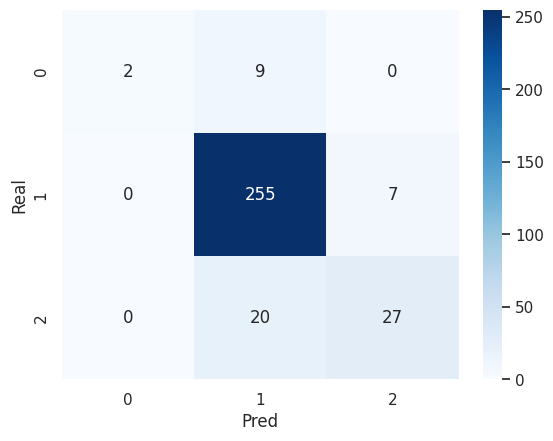

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred_test)
print("Classificaion report:\n", cr)

Classificaion report:
               precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.90      0.97      0.93       262
           2       0.79      0.57      0.67        47

    accuracy                           0.89       320
   macro avg       0.90      0.58      0.64       320
weighted avg       0.89      0.89      0.87       320



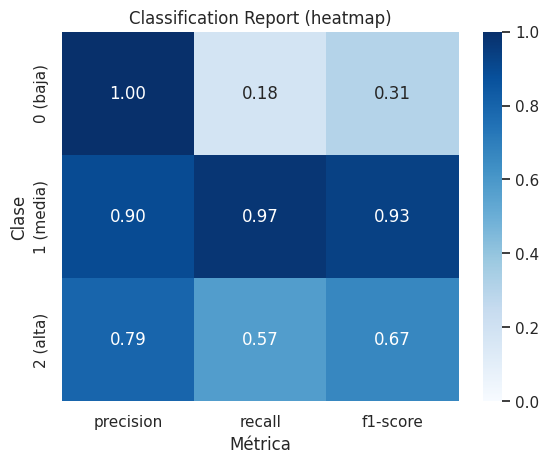

In [62]:
rep = classification_report(
    y_test, y_pred_test,
    output_dict=True,
    target_names=["0 (baja)", "1 (media)", "2 (alta)"]
)
total_data = pd.DataFrame(rep).T

heat = total_data.loc[["0 (baja)", "1 (media)", "2 (alta)"], ["precision", "recall", "f1-score"]]

sns.heatmap(heat, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="Blues")
plt.title("Classification Report (heatmap)")
plt.ylabel("Clase"); plt.xlabel("Métrica")
plt.show()
